# **Random Forest(RF) on IoT Combined Dataset**

****Importing libraries****

In [3]:
import timeit
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
#warnings.filterwarnings('always') 

**Upload File**

In [4]:
#uploaded = files.upload()

**Importing the Dataset**

In [5]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

import io

dataset = pd.read_csv(io.BytesIO(uploaded['Processed_Combined_IoT_dataset.csv']))

Saving Processed_Combined_IoT_dataset.csv to Processed_Combined_IoT_dataset.csv


**Exploratory Data Analysis**

In [6]:
dataset.head()

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,current_temperature,door_state,fridge_temperature,humidity,latitude,light_status,longitude,motion_status,pressure,sphone_signal,temp_condition,temperature,thermostat_status,label
0,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.930769,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0
1,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.588462,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0
2,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.076923,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1,0
3,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.292308,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1,0
4,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.746154,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0


In [7]:
print(dataset.shape)

(401119, 18)


In [8]:
print(list(dataset.columns))

['FC1_Read_Input_Register', 'FC2_Read_Discrete_Value', 'FC3_Read_Holding_Register', 'FC4_Read_Coil', 'current_temperature', 'door_state', 'fridge_temperature', 'humidity', 'latitude', 'light_status', 'longitude', 'motion_status', 'pressure', 'sphone_signal', 'temp_condition', 'temperature', 'thermostat_status', 'label']


In [9]:
target_cols=list(dataset.columns[-1:])
target_cols

['label']

In [10]:
feature_cols= list(dataset.columns[:-1])
feature_cols

['FC1_Read_Input_Register',
 'FC2_Read_Discrete_Value',
 'FC3_Read_Holding_Register',
 'FC4_Read_Coil',
 'current_temperature',
 'door_state',
 'fridge_temperature',
 'humidity',
 'latitude',
 'light_status',
 'longitude',
 'motion_status',
 'pressure',
 'sphone_signal',
 'temp_condition',
 'temperature',
 'thermostat_status']

**Split Dataset**

In [11]:
#split dataset in features and target variable
X = dataset.drop('label', axis=1) # Features
y = dataset['label'] # Target variable

In [12]:
X.head()

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,current_temperature,door_state,fridge_temperature,humidity,latitude,light_status,longitude,motion_status,pressure,sphone_signal,temp_condition,temperature,thermostat_status
0,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.930769,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1
1,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.588462,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1
2,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.076923,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1
3,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.292308,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1
4,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.746154,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1


In [13]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

**Splitting Data**

In [14]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [15]:
# Check the shape of all of these
print("X_train shape is : ", X_train.shape)
print("X_test shape  is : ", X_test.shape)
print("y_train shape is : ", y_train.shape)
print("y_test shape is  : ", y_test.shape)

X_train shape is :  (280783, 17)
X_test shape  is :  (120336, 17)
y_train shape is :  (280783,)
y_test shape is  :  (120336,)


**Building Model**

In [16]:
#Calculate start time
start = timeit.default_timer()

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

In [17]:
#Calculate start time
start = timeit.default_timer()

# Predict the model
y_pred=clf.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

**Evaluating Model**

In [18]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[69916  3579]
 [12098 34743]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     73495
           1       0.91      0.74      0.82     46841

    accuracy                           0.87    120336
   macro avg       0.88      0.85      0.86    120336
weighted avg       0.87      0.87      0.87    120336



In [19]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))

#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

Accuracy: 0.8697231086291717
Precision: 0.9066071708157194
Recall: 0.7417219956875387
F1 Score: 0.8159177107429283
Mean Absolute Error: 0.13027689137082835
Cohens kappa: 0.7166594961151553
ROC AUC: 0.8465124027012427
Train Time(s):  64.67026302699992
Test Time(s):  3.556681608999952


Multi-Layer Perceptron Classifier

Train Time(s):  86.77516502899994
[[70574  2921]
 [21801 25040]]
error: 0.20544143066081633
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.96      0.85     73495
           1       0.90      0.53      0.67     46841

    accuracy                           0.79    120336
   macro avg       0.83      0.75      0.76    120336
weighted avg       0.82      0.79      0.78    120336

Test Time(s):  0.4735506740000801
************************************
The accuracy for each attack type is [0.9602558  0.53457441]
************************************
the Fpr rate is: [0.46542559 0.0397442 ]



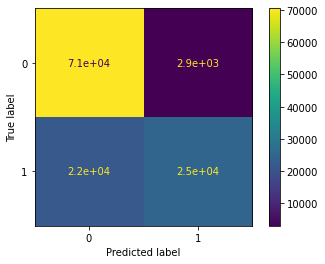

In [20]:
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.neural_network import MLPClassifier
import timeit

start1 = timeit.default_timer()
classifier_1 = MLPClassifier(solver = 'sgd', alpha = 1e-5, hidden_layer_sizes = (5,2), random_state = 1)

classifier_1.fit(X_train, y_train)
stop1 = timeit.default_timer()
train_time1= stop1 - start1
#Train time
print('Train Time(s): ',train_time1)
start2 = timeit.default_timer()
prediction_y_1 = classifier_1.predict(X_test)

P = confusion_matrix(y_test,prediction_y_1)
error = zero_one_loss(y_test,prediction_y_1)

print(P)
print('error:',error)
print('Classification Report:')
print(classification_report(y_test,prediction_y_1))
stop2 = timeit.default_timer()
test_time1= stop2 - start2 
#Test time
print('Test Time(s): ',test_time1)
print('************************************')
print('The accuracy for each attack type is', P.diagonal()/P.sum(axis=1))
FalsePositive1 = P.sum(axis=0) - P.diagonal()
FalseNegative1 = P.sum(axis=1) - P.diagonal()
TruePositive1 = P.diagonal()
TrueNegative1 = P.sum() - (FalsePositive1 + FalseNegative1 + TruePositive1)
print('************************************')
print('the Fpr rate is:', FalsePositive1/(FalsePositive1 + TrueNegative1))
print()
plot_confusion_matrix(classifier_1, X_test, y_test)
plt.show()


Logistic Regression

Train Time(s):  14.123165380000046
[[71660  1835]
 [35726 11115]]
error: 0.3121343571333599
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.98      0.79     73495
           1       0.86      0.24      0.37     46841

    accuracy                           0.69    120336
   macro avg       0.76      0.61      0.58    120336
weighted avg       0.74      0.69      0.63    120336

Test Time(s):  0.4374112340001375
************************************
The accuracy for each attack type is [0.97503232 0.23729212]
************************************
the Fpr rate is: [0.76270788 0.02496768]



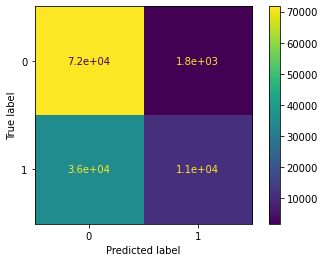

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import timeit

start3 = timeit.default_timer()
classifier_2 = LogisticRegression(solver = 'newton-cg', random_state=0, multi_class = 'multinomial')
classifier_2.fit(X_train, y_train)
stop3 = timeit.default_timer()
train_time2 = stop3 - start3
#Train time
print('Train Time(s): ',train_time2)
start4 = timeit.default_timer()
prediction_y_2 = classifier_2.predict(X_test)

P = confusion_matrix(y_test,prediction_y_2)
error = zero_one_loss(y_test,prediction_y_2)

print(P)
print('error:',error)
print('Classification Report:')
print(classification_report(y_test,prediction_y_2))
stop4 = timeit.default_timer()
test_time2 = stop4 - start4
#Test time
print('Test Time(s): ',test_time2)
print('************************************')
print('The accuracy for each attack type is', P.diagonal()/P.sum(axis=1))
FalsePositive2 = P.sum(axis=0) - P.diagonal()
FalseNegative2 = P.sum(axis=1) - P.diagonal()
TruePositive2 = P.diagonal()
TrueNegative2 = P.sum() - (FalsePositive2 + FalseNegative2 + TruePositive2)
print('************************************')
print('the Fpr rate is:', FalsePositive2/(FalsePositive2 + TrueNegative2))
print()
plot_confusion_matrix(classifier_2, X_test, y_test)
plt.show()

Nearest Centroid

Train Time(s):  0.059029901000030804
[[68129  5366]
 [30112 16729]]
error: 0.2948244914240128
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.93      0.79     73495
           1       0.76      0.36      0.49     46841

    accuracy                           0.71    120336
   macro avg       0.73      0.64      0.64    120336
weighted avg       0.72      0.71      0.67    120336

Test Time(s):  0.4538353539999207
************************************
The accuracy for each attack type is [0.92698823 0.35714438]
************************************
the Fpr rate is: [0.64285562 0.07301177]



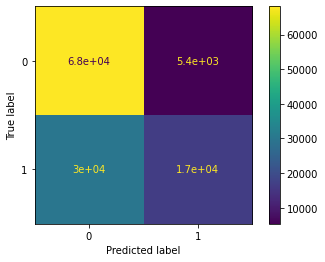

In [22]:
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import NearestCentroid
import timeit

start5 = timeit.default_timer()

classifier_3 = NearestCentroid()
classifier_3.fit(X_train, y_train)
stop5 = timeit.default_timer()
train_time3 = stop5 - start5
#Train time
print('Train Time(s): ',train_time3)
start6 = timeit.default_timer()
prediction_y_3 = classifier_3.predict(X_test)

P = confusion_matrix(y_test, prediction_y_3)
error = zero_one_loss(y_test, prediction_y_3)

print(P)
print('error:', error)
print('Classification Report:')
print(classification_report(y_test, prediction_y_3))
stop6 = timeit.default_timer()
test_time3 = stop6 - start6 
#Test time
print('Test Time(s): ',test_time3)
print('************************************')
print('The accuracy for each attack type is', P.diagonal()/P.sum(axis=1))
FalsePositive3 = P.sum(axis=0) - P.diagonal()
FalseNegative3 = P.sum(axis=1) - P.diagonal()
TruePositive3 = P.diagonal()
TrueNegative3 = P.sum() - (FalsePositive3 + FalseNegative3 + TruePositive3)
print('************************************')
print('the Fpr rate is:', FalsePositive3/(FalsePositive3 + TrueNegative3))
print()
plot_confusion_matrix(classifier_3, X_test, y_test)
plt.show()

Random Forest Classifier

Train Time(s):  8.129903158000161
[[71488  2007]
 [28428 18413]]
error: 0.25291683286796973
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.97      0.82     73495
           1       0.90      0.39      0.55     46841

    accuracy                           0.75    120336
   macro avg       0.81      0.68      0.69    120336
weighted avg       0.79      0.75      0.72    120336

Test Time(s):  0.9873947589999261
************************************
The accuracy for each attack type is [0.97269202 0.39309579]
************************************
the Fpr rate is: [0.60690421 0.02730798]



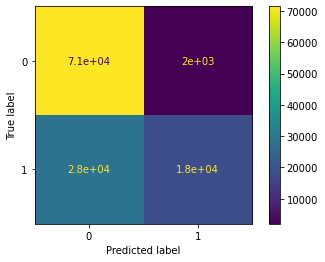

In [23]:
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import timeit

start7 = timeit.default_timer()
classifier_4 = RandomForestClassifier(max_depth = 2, random_state = 0)
classifier_4.fit(X_train, y_train)
stop7 = timeit.default_timer()
train_time4 = stop7 - start7
#Train time
print('Train Time(s): ',train_time4)
start8 = timeit.default_timer()
prediction_y_4 = classifier_4.predict(X_test)

P = confusion_matrix(y_test, prediction_y_4)
error = zero_one_loss(y_test, prediction_y_4)

print(P)
print('error:',error)
print('Classification Report:')
print(classification_report(y_test, prediction_y_4))
stop8 = timeit.default_timer()
test_time4 = stop8 - start8
#Test time
print('Test Time(s): ',test_time4)
print('************************************')
print('The accuracy for each attack type is', P.diagonal()/P.sum(axis=1))
FalsePositive4 = P.sum(axis=0) - P.diagonal()
FalseNegative4 = P.sum(axis=1) - P.diagonal()
TruePositive4 = P.diagonal()
TrueNegative4 = P.sum() - (FalsePositive4 + FalseNegative4 + TruePositive4)
print('************************************')
print('the Fpr rate is:', FalsePositive4/(FalsePositive4 + TrueNegative4))
print()
plot_confusion_matrix(classifier_4, X_test, y_test)
plt.show()

Decision Tree

Train Time(s):  2.4421667369999795
[[69377  4118]
 [12140 34701]]
error: 0.13510503922350747
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.90     73495
           1       0.89      0.74      0.81     46841

    accuracy                           0.86    120336
   macro avg       0.87      0.84      0.85    120336
weighted avg       0.87      0.86      0.86    120336

Test Time(s):  0.42701062799983447
************************************
The accuracy for each attack type is [0.94396898 0.74082535]
************************************
the Fpr rate is: [0.25917465 0.05603102]



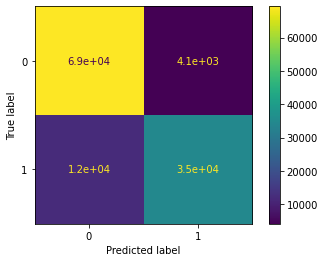

In [24]:
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import timeit

start9 = timeit.default_timer()
classifier_5 = DecisionTreeClassifier()
classifier_5.fit(X_train, y_train)
stop9 = timeit.default_timer()
train_time5 = stop9 - start9
#Train time
print('Train Time(s): ',train_time5)
start10 = timeit.default_timer()
prediction_y_5 = classifier_5.predict(X_test)

P = confusion_matrix(y_test, prediction_y_5)
error = zero_one_loss(y_test, prediction_y_5)

print(P)
print('error:', error)
print('Classification Report:')
print(classification_report(y_test, prediction_y_5))
stop10 = timeit.default_timer()
test_time5 = stop10 - start10 
#Test time
print('Test Time(s): ',test_time5)
print('************************************')
print('The accuracy for each attack type is', P.diagonal()/P.sum(axis=1))
FalsePositive5 = P.sum(axis=0) - P.diagonal()
FalseNegative5 = P.sum(axis=1) - P.diagonal()
TruePositive5 = P.diagonal()
TrueNegative5 = P.sum() - (FalsePositive5 + FalseNegative5 + TruePositive5)
print('************************************')
print('the Fpr rate is:', FalsePositive5/(FalsePositive5 + TrueNegative5))
print()
plot_confusion_matrix(classifier_5, X_test, y_test)
plt.show()

Confusion Matrix for all algorithms

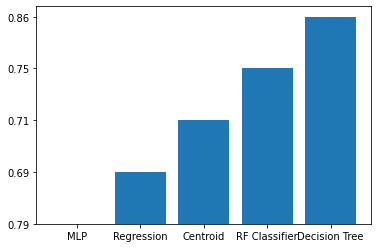

In [25]:
from sklearn.metrics import plot_confusion_matrix
B_R=['MLP', 'Regression', 'Centroid', 'RF Classifier', 'Decision Tree']
B_Y=['0.79','0.69','0.71','0.75','0.86']
plt.bar(B_R,B_Y)
plt.show()